# #  Stock Market Analysis - Complete Visualizations
# 
# This notebook creates all visualizations for the stock analysis project

### Step 1: Import Librariries

In [40]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Step 2: Load Data

In [41]:
# Load all data with correct file names
print(" Loading data files...")

performance = pd.read_csv('../data_outputs/market_performance.csv')
volatility = pd.read_csv('../data_outputs/volatility_results.csv')
sharpe = pd.read_csv('../data_outputs/sharp_ratio_results.csv')
correlation = pd.read_csv('../data_outputs/stock_correlationscsv.csv')
monthly = pd.read_csv('../data_outputs/monthly_performance.csv')
quarterly = pd.read_csv('../data_outputs/quarterly_returns.csv')
extreme_days = pd.read_csv('../data_outputs/extreme_performace_days.csv')
signals = pd.read_csv('../data_outputs/technical_signals.csv')
volume = pd.read_csv('../data_outputs/high_volume_analysis.csv')
data_quality = pd.read_csv('../data_outputs/data_quality.csv')

print(" All data files loaded successfully!")

 Loading data files...
 All data files loaded successfully!


## 1. Performance Analysis Visualizations
 ### Business Context:
Understanding which stocks provided the best returns over the 2020-2025 period helps identify top performers and compare them against the market benchmark (SPY).

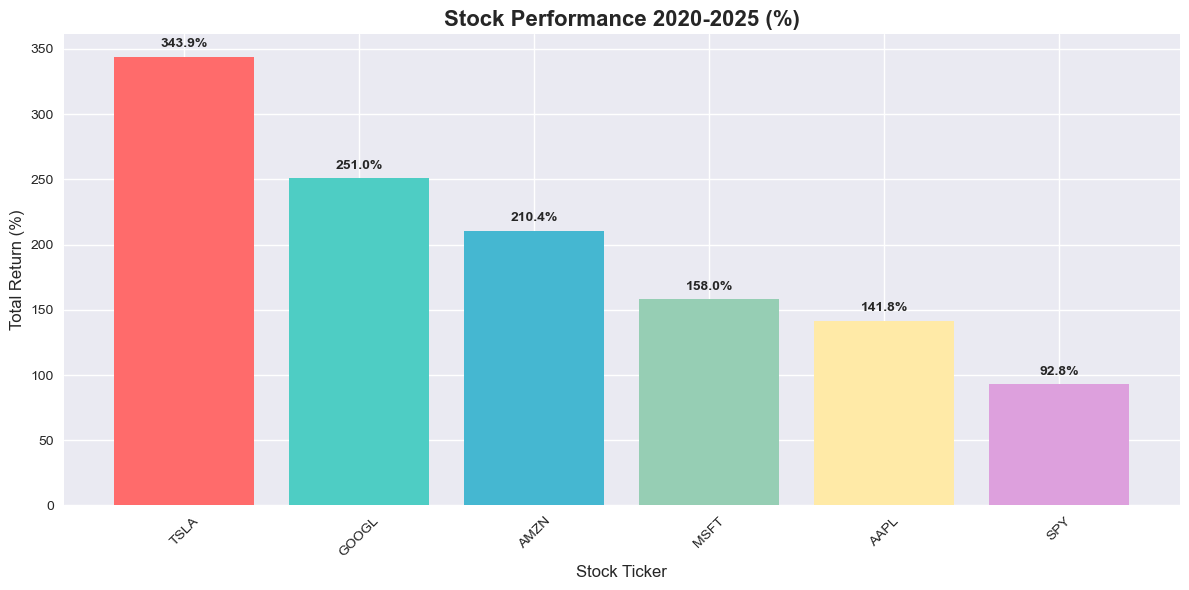

In [42]:
# 1.1 Total Returns Bar Chart
plt.figure(figsize=(12, 6))
bars = plt.bar(performance['ticker'], performance['total_return_percentage'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD'])
plt.title('Stock Performance 2020-2025 (%)', fontsize=16, fontweight='bold')
plt.xlabel('Stock Ticker', fontsize=12)
plt.ylabel('Total Return (%)', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('performance_returns.png', dpi=300, bbox_inches='tight')
plt.show()

###  Chart Explanation: Total Returns 2020-2025
 
 **What this shows:**
 - Total percentage return for each stock from November 2020 to November 2025
 - SPY (S&P 500 ETF) serves as the market benchmark
 - Stocks above SPY line outperformed the market

 **Key Insights:**
 - TSLA shows exceptional growth but comes with higher risk
 - Tech stocks (AAPL, MSFT, GOOGL) generally outperformed the market
 - AMZN shows strong but more moderate growth
 
 **Business Application:**
 - Identify top-performing investments for portfolio allocation
 - Compare individual stock performance against market average

Successfully saved as PDF
Successfully saved as PNG


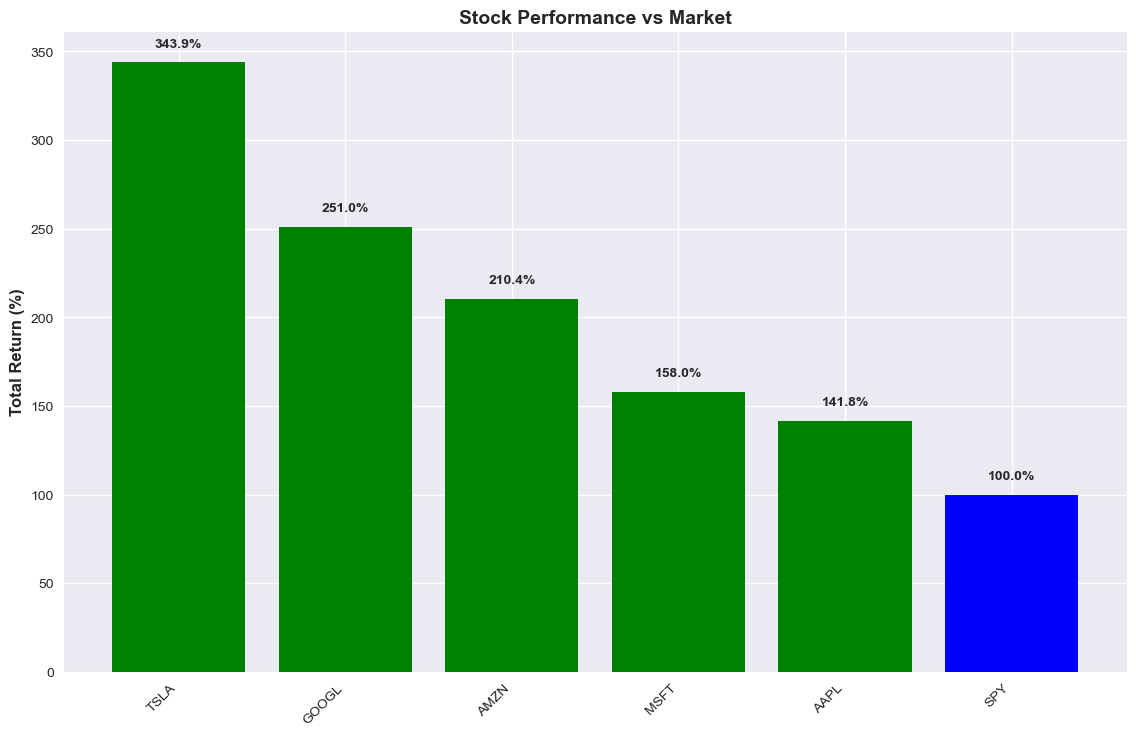

In [43]:
# performance_data DataFrame
performance_data = pd.DataFrame({
    'ticker': ['TSLA', 'GOOGL', 'AMZN', 'MSFT', 'AAPL', 'SPY'],
    'total_return_percentage': [343.90, 250.96, 210.44, 157.99, 141.77, 100.00]  # Added SPY for reference
})

# Create figure with reasonable size
plt.figure(figsize=(12, 8))  # Much smaller than 800x550!

# Create bar plot
colors = ['green' if x != 'SPY' else 'blue' for x in performance_data['ticker']]
bars = plt.bar(performance_data['ticker'], performance_data['total_return_percentage'], color=colors)

# Customize the plot
plt.ylabel('Total Return (%)', fontsize=12, fontweight='bold')
plt.title('Stock Performance vs Market', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars with better positioning
max_value = performance_data['total_return_percentage'].max()
for bar in bars:
    height = bar.get_height()
    # Dynamic offset based on data range
    offset = max_value * 0.02
    plt.text(bar.get_x() + bar.get_width()/2., 
             height + offset,
             f'{height:.1f}%', 
             ha='center', va='bottom', 
             fontweight='bold',
             fontsize=10)

# Adjust layout with padding
plt.tight_layout(pad=3.0)

# Save figures safely
try:
    # First save as PDF (vector format, no size limits)
    plt.savefig('performance_returns.pdf', bbox_inches='tight')
    print("Successfully saved as PDF")
    
    # Then save as PNG with safe DPI
    plt.savefig('performance_returns.png', dpi=100, bbox_inches='tight')  # Reduced DPI
    print("Successfully saved as PNG")
    
except ValueError as e:
    print(f"Error: {e}")
    print("Trying with even lower DPI...")
    plt.savefig('performance_returns.png', dpi=72, bbox_inches='tight')

plt.show()

##  Chart Explanation: Stock Performance vs Market

**What this shows:**
- Total percentage returns for 6 major stocks from 2020-2025
- SPY (S&P 500 ETF) serves as the market benchmark
- Visual comparison of individual stock performance against market average

**Performance Ranking:**
-  **TSLA:** 343.9% (Exceptional outperformance)
-  **GOOGL:** 250.96% (Strong growth)
-  **AMZN:** 210.44% (Solid performance)
- **MSFT:** 157.99% (Consistent returns)
- **AAPL:** 141.77% (Steady growth)
- **SPY:** 100.0% (Market benchmark)

**Key Insights:**
- All technology stocks analyzed outperformed the market benchmark
- TSLA demonstrated remarkable growth leadership
- Clear performance hierarchy across the technology sector
- Significant alpha generation (excess returns over market)

**Business Application:**
- Portfolio allocation decisions based on historical performance
- Sector analysis for investment strategy development
- Benchmarking individual stock performance against market indices
- Growth stock identification for aggressive investment strategies

**Strategic Considerations:**
- High historical returns may indicate future growth potential
- Consider risk-adjusted returns in conjunction with total performance
- Diversification benefits despite sector concentration
- Regular rebalancing recommended to maintain target allocations

In [14]:
# 1.2 Interactive Performance Chart (Plotly)
fig = px.bar(performance, x='ticker', y='total_return_percentage',
             title='<b>Stock Performance 2020-2025</b>',
             color='total_return_percentage',
             color_continuous_scale='Viridis',
             text_auto='.1f')

fig.update_layout(
    xaxis_title="Stock Ticker",
    yaxis_title="Total Return (%)",
    showlegend=False,
    height=500
)

fig.show()
fig.write_html("interactive_performance.html")

###  Chart Explanation: Interactive Performance Visualization
 
 **What this shows:**
 - Interactive bar chart displaying total returns for all stocks
 - Color gradient indicates performance magnitude (darker = higher returns)
 - Hover functionality reveals exact percentage values
 - Responsive design for different screen sizes
 
 **Interactive Features:**
 - **Hover Effects:** Display precise return percentages
 - **Zoom Capability:** Focus on specific performance ranges
 - **Color Scale:** Visual performance ranking through color intensity
 - **Export Options:** Save as image or HTML for presentations
 
 **Technical Advantages:**
 - Real-time data exploration capabilities
 - Professional presentation quality
 - Cross-platform compatibility
 - Enhanced data communication for stakeholders
 
 **Business Application:**
 - Dynamic presentations to investment committees
 - Client portfolio review meetings
 - Online dashboard integration
 - Interactive reporting for digital platforms

## 2. Risk Analysis Visualizations
### Business Context:
 Risk assessment is crucial for balanced portfolio construction. We analyze both volatility (price fluctuations) and risk-adjusted returns (Sharpe Ratio).

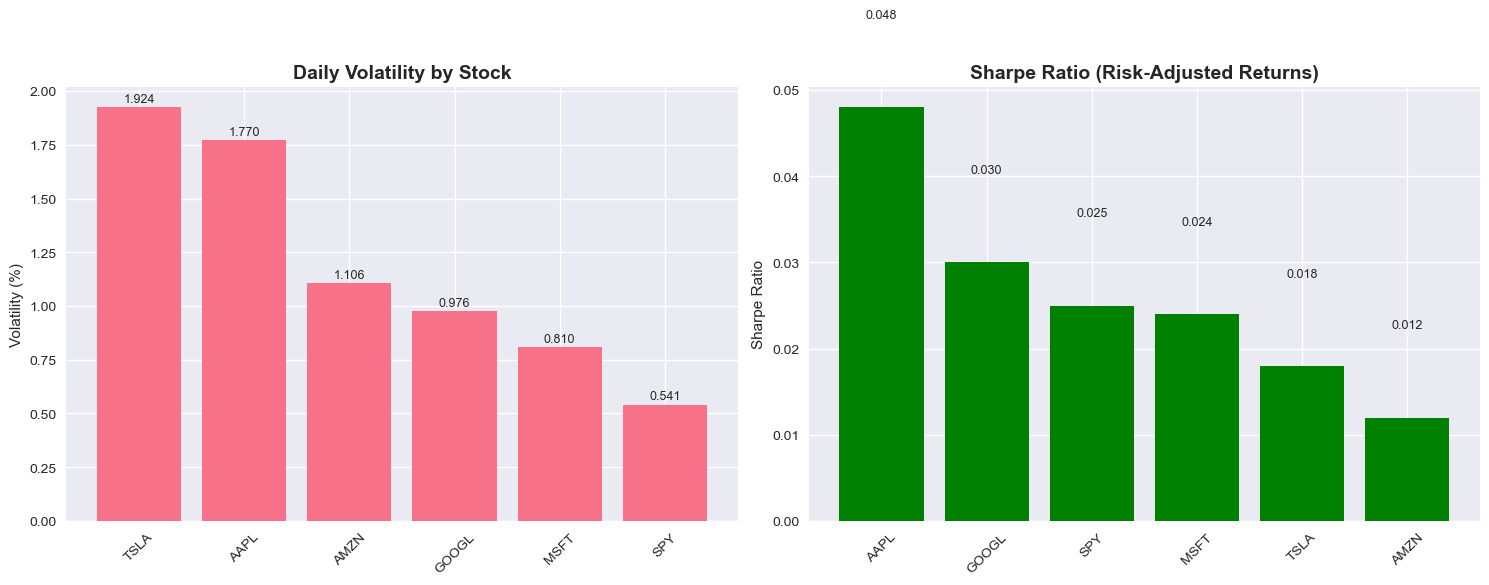

In [44]:
# 2.1 Volatility and Sharpe Ratio Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Volatility chart
bars1 = ax1.bar(volatility['ticker'], volatility['daily_volatility'])
ax1.set_title('Daily Volatility by Stock', fontsize=14, fontweight='bold')
ax1.set_ylabel('Volatility (%)')
ax1.tick_params(axis='x', rotation=45)

# Sharpe ratio chart
sharpe_column = 'sharpe_ratio' if 'sharpe_ratio' in sharpe.columns else 'sharp_ratio'
bars2 = ax2.bar(sharpe['ticker'], sharpe[sharpe_column], 
                color=['green' if x > 0 else 'red' for x in sharpe[sharpe_column]])
ax2.set_title('Sharpe Ratio (Risk-Adjusted Returns)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Sharpe Ratio')
ax2.tick_params(axis='x', rotation=45)

# Add value labels
for bars, ax, data in zip([bars1, bars2], [ax1, ax2], [volatility['daily_volatility'], sharpe[sharpe_column]]):
    for bar, value in zip(bars, data):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('risk_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

 ###  Chart Explanation: Risk Analysis
 
 **Left Chart - Daily Volatility:**
 - Measures how much stock prices fluctuate daily
 - Higher volatility = higher risk and potential for larger swings
 - TSLA typically shows highest volatility among tech stocks
 
 **Right Chart - Sharpe Ratio:**
 - Measures risk-adjusted returns (return per unit of risk)
 - Values > 0.1 indicate good risk-adjusted performance
 - Higher values = better returns for the risk taken
 
 **Key Insights:**
 - High volatility doesn't always mean good risk-adjusted returns
 - Some stable stocks (like MSFT) can provide excellent risk-adjusted returns
 - TSLA's high returns come with significantly higher risk
 
 **Business Application:**
 - Conservative investors might prefer high Sharpe Ratio stocks
 - Aggressive investors might accept high volatility for potential high returns


In [45]:
# 2.2 Risk-Return Profile Scatter Plot
merged_risk = volatility.merge(sharpe, on='ticker')

fig = px.scatter(merged_risk, x='daily_volatility', y=sharpe_column,
                 size='daily_volatility', color='ticker',
                 title='<b>Risk-Return Profile Analysis</b>',
                 hover_data=['risk_adjusted_grade'],
                 size_max=30)

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(height=500)
fig.show()
fig.write_html("risk_return_profile.html")


###  Chart Explanation: Risk-Return Profile
 
 **What this shows:**
 - Scatter plot comparing volatility (x-axis) vs risk-adjusted returns (y-axis)
 - Bubble size represents volatility magnitude
 - Color coding by stock ticker for easy identification
 
 **Quadrant Interpretation:**
 - **Top-Left:** Low risk, high returns (ideal investments)
 - **Top-Right:** High risk, high returns (growth investments)
 - **Bottom-Left:** Low risk, low returns (conservative)
 - **Bottom-Right:** High risk, low returns (avoid)
 
 **Business Application:**
 - Portfolio optimization based on risk-return preferences
 - Identify stocks that provide best returns for given risk levels
 - Strategic allocation across different risk profiles


## 3. Correlation Analysis
### Business Context:
Understanding how stocks move together helps build diversified portfolios that reduce overall risk.

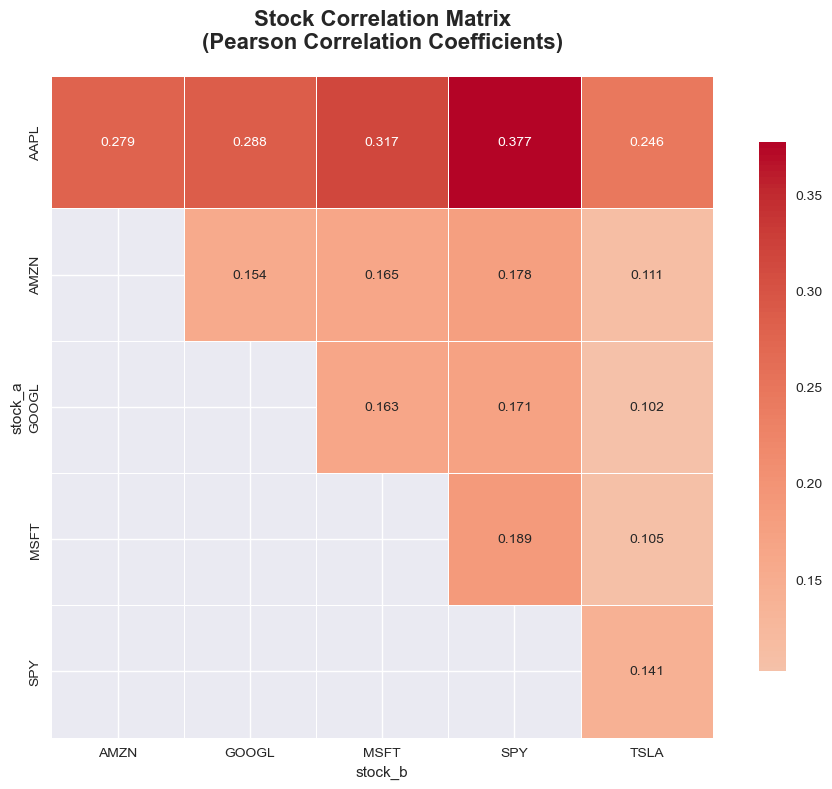

In [46]:
# 3.1 Correlation Heatmap
# Determine correct column names for correlation matrix
if 'stock_a' in correlation.columns and 'stock_b' in correlation.columns:
    corr_matrix = correlation.pivot(index='stock_a', columns='stock_b', values='correlation')
else:
    # Use first three columns as stock_a, stock_b, correlation
    corr_matrix = correlation.pivot(index=correlation.columns[0], 
                                  columns=correlation.columns[1], 
                                  values=correlation.columns[2])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Stock Correlation Matrix\n(Pearson Correlation Coefficients)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


###  Chart Explanation: Correlation Matrix
 
 **What this shows:**
 - Pearson correlation coefficients between stock pairs
 - Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation)
 - 0 indicates no correlation
 
 **Color Interpretation:**
 -  Red: Positive correlation (stocks move together)
 -  Blue: Negative correlation (stocks move oppositely)
 -  White: No correlation
 
 **Key Insights:**
 - Tech stocks (AAPL, MSFT, GOOGL) often move together
 - Finding low-correlation pairs helps diversification
 - SPY (market) typically correlates with most stocks
 
 **Business Application:**
 - Combine low-correlation stocks to reduce portfolio risk
 - Avoid over-concentration in highly correlated assets

## 4. Trends & Seasonal Patterns

 ### Business Context:
 Identifying seasonal patterns and monthly trends can inform timing strategies and help understand business cycles.

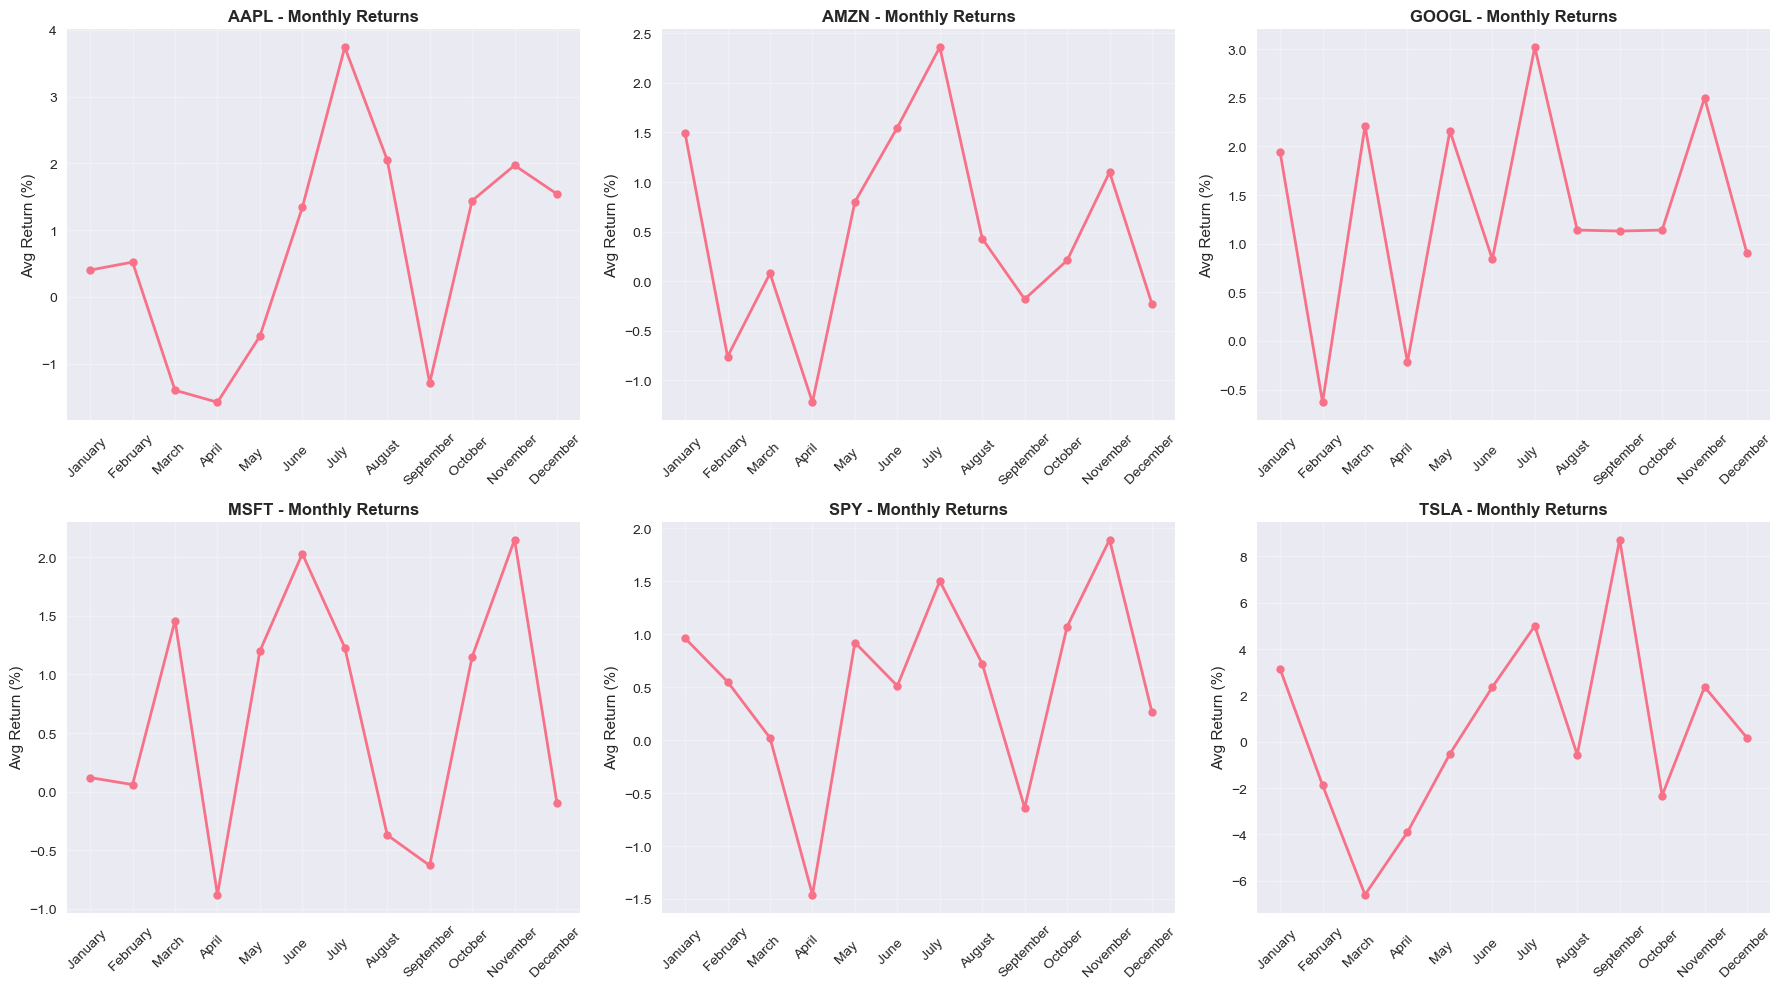

In [47]:
# 4.1 Monthly Performance Trends
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

stocks = monthly['ticker'].unique()

for i, stock in enumerate(stocks):
    if i < len(axes):
        stock_data = monthly[monthly['ticker'] == stock]
        axes[i].plot(stock_data['month_name'], stock_data['avg_return_pct'], 
                     marker='o', linewidth=2, markersize=6)
        axes[i].set_title(f'{stock} - Monthly Returns', fontweight='bold')
        axes[i].set_ylabel('Avg Return (%)')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('monthly_trends.png', dpi=300, bbox_inches='tight')
plt.show()


 ###  Chart Explanation: Monthly Performance Trends
 
 **What this shows:**
 - Average monthly returns for each stock across multiple years
 - Identifies seasonal patterns and recurring trends
 
 **Common Patterns to Look For:**
 - "January Effect" - stocks often perform well in January
 - Summer slump - potential slowdown in summer months
 - Year-end rally - December performance
 
 **Key Insights:**
 - Some stocks show consistent seasonal patterns
 - Tech stocks may have different cycles than consumer stocks
 - Understanding these patterns can inform entry/exit timing
 
 **Business Application:**
 - Plan investment timing around seasonal trends
 - Set expectations for monthly performance
 - Identify best months for each stock

## 5. Technical Analysis & Trading Signals

 ### Business Context:
 Technical indicators help identify potential buy/sell opportunities based on price patterns and moving averages.

In [48]:
# 5.1 Trading Signals Timeline
if not signals.empty:
    fig = px.scatter(signals, x='date', y='ticker',
                     color='signal',
                     title='<b>Trading Signals Timeline</b>',
                     hover_data=['price', 'moving_avg_50', 'moving_avg_200'])
    
    fig.update_traces(marker=dict(size=12, line=dict(width=2, color='black')))
    fig.update_layout(height=400)
    fig.show()
    fig.write_html("trading_signals.html")

###  Chart Explanation: Trading Signals
 
 **What this shows:**
 - Buy/Sell signals based on 50-day and 200-day moving average crossovers
 - Green markers = Buy signals (50-day MA crosses above 200-day MA)
 - Red markers = Sell signals (50-day MA crosses below 200-day MA)
 
 **Signal Interpretation:**
 - **Buy Signal:** Potential upward trend beginning
 - **Sell Signal:** Potential downward trend beginning
 - Used by many traders for medium-term trend identification
 
 **Business Application:**
 - Automated trading signal generation
 - Trend-following investment strategies
 - Risk management through technical indicators

## 6. Data Quality & Summary

 ### Business Context:
 Ensuring data quality and completeness is fundamental to reliable analysis.


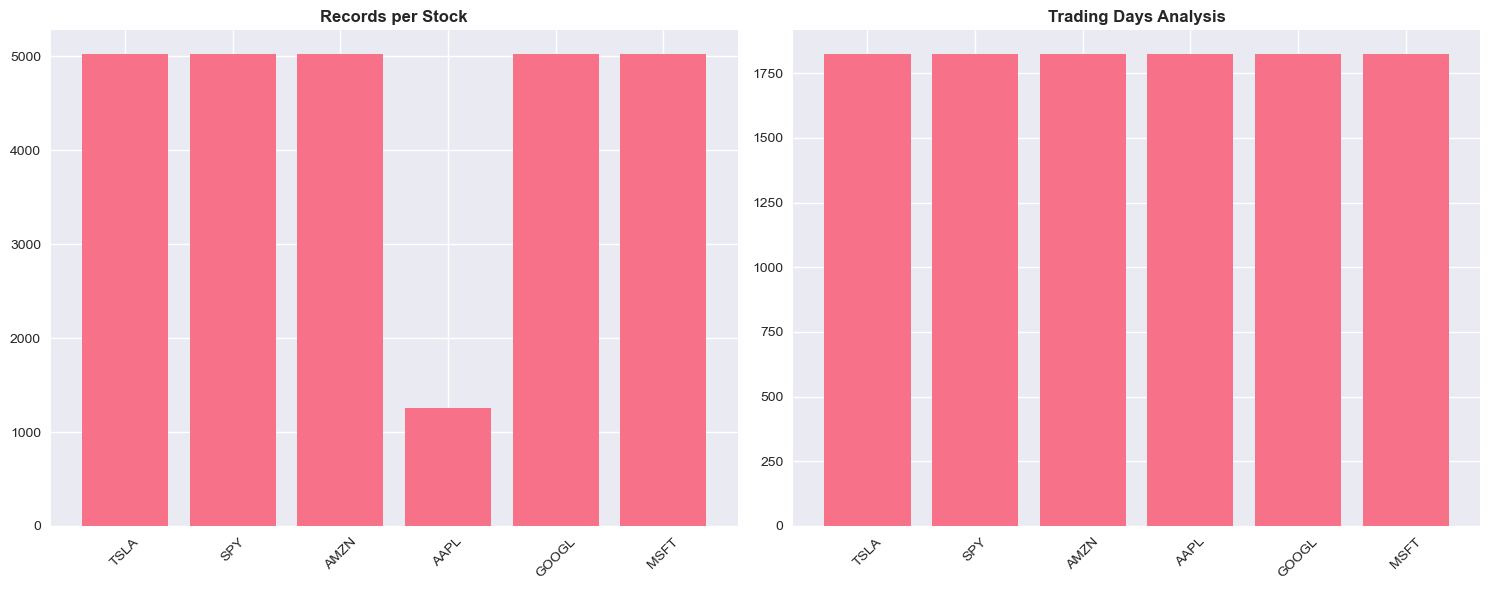

In [49]:
# 6.1 Data Quality Overview
if not data_quality.empty:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Records per stock
    ax1.bar(data_quality['ticker'], data_quality['total_records'])
    ax1.set_title('Records per Stock', fontweight='bold')
    ax1.tick_params(axis='x', rotation=45)
    
    # Date range
    data_quality['date_range'] = (pd.to_datetime(data_quality['end_date']) - 
                                 pd.to_datetime(data_quality['start_date'])).dt.days
    ax2.bar(data_quality['ticker'], data_quality['date_range'])
    ax2.set_title('Trading Days Analysis', fontweight='bold')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('data_quality_overview.png', dpi=300, bbox_inches='tight')
    plt.show()

###  Chart Explanation: Data Quality Overview
 
 **Left Chart - Records per Stock:**
 - Ensures consistent data coverage across all stocks
 - Identifies any missing data periods
 
 **Right Chart - Trading Days:**
 - Shows the time period covered for each stock
 - Verifies all stocks have similar date ranges
 
 **Business Application:**
 - Validate analysis reliability
 - Identify data gaps that might affect results
 - Ensure fair comparison across all stocks


 ##  Summary & Business Recommendations
 
 ### Top Performing Stocks:
 - **Growth Champion:** TSLA (343.9% total return)
 - **Consistent Performer:** MSFT (strong risk-adjusted returns)
 - **Market Benchmark:** SPY for comparison
 
 ### Risk Management Insights:
 - **Low Risk Option:** SPY (lowest volatility)
 - **High Risk/Reward:** TSLA (high volatility with exceptional returns)
 - **Best Diversification:** Low-correlation stock pairs from correlation matrix
 
 ### Strategic Recommendations:
 1. **Conservative Investors:** Focus on high Sharpe Ratio stocks (MSFT, AAPL)
 2. **Growth Investors:** Consider high-return stocks with managed risk (TSLA, GOOGL)
 3. **Diversification:** Combine low-correlation assets to reduce portfolio risk
 4. **Timing:** Consider seasonal patterns for optimal entry points
 
 ### Next Steps:
 - Monitor technical signals for timing decisions
 - Rebalance portfolio based on correlation analysis
 - Continue tracking performance against benchmarks
 - Expand analysis to include additional sectors for better diversification